# Series de tiempo clase 1

## La prediccion (Fundamentos de los modelos estadisticos)

- En esta parte se establecen unos métodos estadísticos sencillos, los cuales son de suma importancia para analizar y predecir datos de series de tiempo. En esta parte se presentan resumenes y graficos respecto a las propiedades de los datos de series de tiempo, a su vez se hace un analisis del uso de ajustes y transformaciones de datos con base en la prediccion y algunos metodos para controlar y caracterizar los modelos predictivos.

````{prf:definition}
:label: forecast_error

-  Consideremos que se dispone de $T$ periodo de los datos que se encuentran disponibles, donde  el periodo $T$ es el más reciente. Ahora consideramos $y_{t}$ la observación de esta variable por periodo de tiempo $t, t = 1,2,\dots, T$. Para ello tendremos que diferenciar entre  una prediccion  de $y_{t}$ que se realizo en algún periodo de tiempo anterior.  $t-\tau$ y un `valor ajustado` de $y_{t}$ que ha resultado de la estimación de los parámetros de un modelo de series temporales a datos históricos. Se tiene en cuenta  $\tau$ como el horizonte de prediccion. 

- A continuacion se hace presente un ejemplo con base en el error de prediccion. 

    $$
    \\[2mm]
    e_{t}(\tau)=y_{t}-\hat{y}_{t}(t-\tau).
    $$

    Por ejemplo, el error de predicción $lead - 1$ es

$$
e_{t}(1)=y_{t}-\hat{y}_{t}(t-1).
$$

- Se denomina residual a la diferencia entre la observación $y_{t}$ y el valor obtenido ajustando un modelo de series temporales a los datos, o un valor ajustado $\hat{y}_{t}$ y se define como: 

$$
e_{t}=y_{t}-\hat{y}_{t}.
$$
````

```{admonition} Observación
:class: tip

- La diferencia  entre `error de predicción` y `residual` es que los modelos suelen ajustarse mejor a los datos históricos. Es decir, los `residuos` de un proceso de ajuste del modelo  serán menores que los `errores de predicción`


```

## Los datos suelen dividirse en distintos tipos. 



- **`Datos transversales`**
- **`Datos de series temporales`**
- **`Datos de panel`**



## Datos transversales

- Los datos transversales de una población se obtienen tomando observaciones de múltiples individuos en el mismo momento. Los datos transversales pueden incluir observaciones tomadas en distintos momentos, pero en estos casos el tiempo no desempeña ningún papel significativo en el análisis. 

```{admonition} Observación
:class: tip

vemos que  las puntuaciones  de los estudiantes y el PIB de los países (Observaciones tomadas en un año) por lo que los conjuntos de datos son de tipo tranversal. Asi, los datos transversales representan un instante o momento dado en ambos casos. 

```

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
sns.set_style("darkgrid")

In [14]:
data = pd.read_csv('datasets/WDIData.csv')
print('Column names:', data.columns)

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')


- Consideramos el tamaño de datos teniendo en cuenta el  número de filas y columnas de  la siguiente línea

In [15]:
print('No. of rows, columns:', data.shape)

No. of rows, columns: (401016, 62)


- conjunto de datos de  401016 filas porque recoge 1504 indicadores de desarrollo mundial para 264 países diferentes. 

In [16]:
nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Unique number of countries: 264


-  Las columnas de 1960 a 2016 tienen los valores de un indicador durante el mismo periodo de tiempo. En esta comprensión de cómo se disponen los datos en el `DataFrame`, ahora estamos preparados para extraer las filas y columnas que son relevantes para nuestra visualización.



In [17]:
central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

- Los codigos anteriores crean  dos nuevos `DataFrame`, y , `central_govt_debt` y `militar_exp`. 

In [18]:
print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

Shape of central_govt_debt: (264, 62)
Shape of military_exp: (264, 62)


- Estos `DataFrame` contienen toda la información que necesitamos. Para trazar los datos univariantes y transversales. Necesitaremos la columna 2010. Antes de ejecutar el código para el trazado, comprobemos rápidamente si falta la columna 2010. Esto se hace mediante las dos líneas siguientes

In [19]:
central_govt_debt['2010'].describe()

count     94.000000
mean      53.048479
std       29.790674
min        0.519665
25%       28.357797
50%       49.540245
75%       75.259012
max      161.596402
Name: 2010, dtype: float64

In [20]:
military_exp['2010'].describe()

count    192.000000
mean       1.988556
std        1.354856
min        0.000000
25%        1.190287
50%        1.613407
75%        2.624711
max        8.565679
Name: 2010, dtype: float64

- Además, queremos que la columna `Country Code` sea el índice de las filas. Así que se ejecutan los siguientes codigos. 

In [21]:
central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

- A continuación, creamos dos `pandas.Series` tomando columnas 2010 no vacías de `central_govt_debt` y `military_exp`. Los objetos `Series` recién creados se unifican para formar un único `DataFrame`

In [22]:
central_govt_debt_2010 = central_govt_debt['2010'].loc[~pd.isnull(central_govt_debt['2010'])]
military_exp_2010 = military_exp['2010'].loc[~pd.isnull(military_exp['2010'])]
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1)
data_to_plot.columns = ['central_govt_debt', 'military_exp']

In [23]:
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
CEB,47.446156,1.482543
EMU,72.414709,1.618759
ECS,63.137736,1.860343
ECA,22.338687,2.933044
TEC,27.287492,2.785617


In [14]:
data_to_plot.shape

(202, 2)

- Hay que tener en cuenta los  países que tienen tanto deuda del gobierno central como gasto militar para poder hacer la grafica. 
 A continuacion se filtran las filas que no tienen valores. 

In [24]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]

In [25]:
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
CEB,47.446156,1.482543
EMU,72.414709,1.618759
ECS,63.137736,1.860343
ECA,22.338687,2.933044
TEC,27.287492,2.785617


In [26]:
data_to_plot.shape

(84, 2)

- La tabla anterior contiene valores no vacíos.
 Ahora se podran realizar los gráficos para los datos transversales. 
 Las siguientes líneas de códigos realizan el gráfico de los datos  transversales sobre el gasto militar
- Para ello realizamos el test de normalidad. 

In [27]:
military_exp_np = np.array(data_to_plot.military_exp)

# Resultados (Interpretacion)

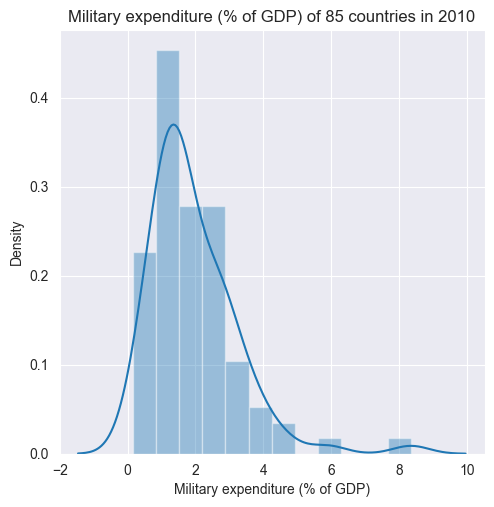

In [28]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(military_exp_np, norm_hist=False)
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010');
plt.xlabel("Military expenditure (% of GDP)");

En la grafica  se puede analizar que el gasto militar en el año  2010  la mayoría de paises incluidos es de menos del 4%. A su vez un grupo pequeño de paises llegan a invertir en gastos militares es del  8% del PIB.`

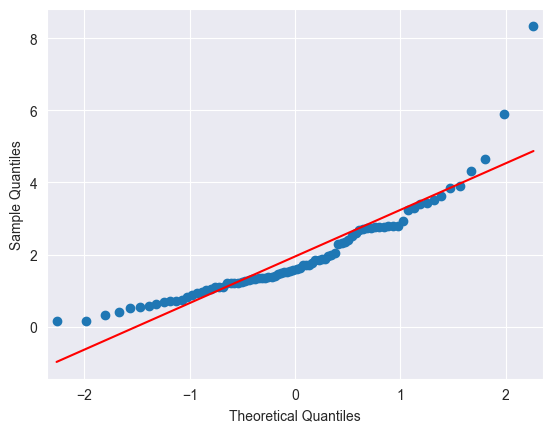

In [20]:
from statsmodels.graphics.gofplots import qqplot

qqplot(military_exp_np, line='s');

segun el grafico quantil quantil los datos no se distribuen de manera normal, ya se habia evidenciado anteriormente con el histograma de los datos, y con este grafico se ve que los puntos se alejan de la linea roja al inicio como al final.

**`Prueba de Shapiro-Wilk`**

- La prueba de `Shapiro-Wilk` evalúa una muestra de datos y cuantifica la probabilidad de que los datos procedan de una distribución gaussiana. En la práctica, se cree que la prueba de `Shapiro-Wilk` es una prueba fiable de normalidad. 
Consideremos las hipotesis:

$$
\begin{align*}
H_{0}&:\quad\textsf{La variable presenta una distribución normal}\\
H_{1}&:\quad\textsf{La variable presenta una distribución no normal}
\end{align*}
$$

In [29]:
from scipy.stats import shapiro

stat, p = shapiro(military_exp_np)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Normal (fail to reject H0)')
else:
 print('Sample does not look Normal (reject H0)')

Statistics=0.857, p=0.000
Sample does not look Normal (reject H0)


`La prueba de shapiro-wilks rechazó HO = "Los datos son normales", por lo tanto no existe evidencia estadistica que respalde que en efecto los datos siguen una distribución normal.`

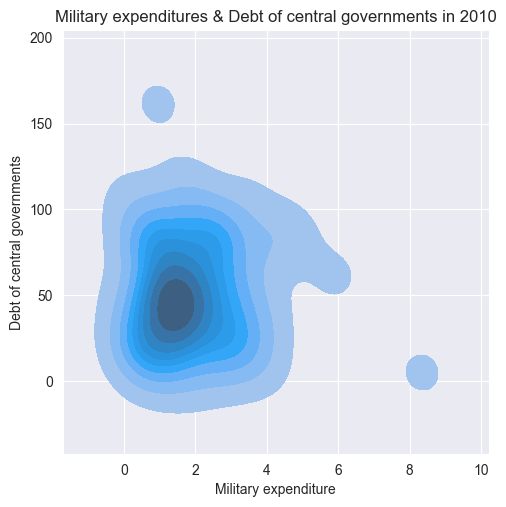

In [13]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot, x = "military_exp", y = "central_govt_debt", fill=True)
g.set_title('Military expenditures & Debt of central governments in 2010');
plt.xlabel("Military expenditure");
plt.ylabel("Debt of central governments");

segun el grafico se evidencia que hay pocos paises con una deuda de gobierno central bastante alta y poco gasto militar, y a su vez hay pocos paises con un gasto militar bastante alto pero la deuda del gobierno central es baja, en conclusion la mayoria de paises distribuyen de manera equitativa el gasto de deuda de gobierno central con el gasto militar.

## Series temporales (Datos)



- los datos representan el `Gasto militar anual y la Deuda pública de Estados Unidos`. Los datos de series temporales suelen caracterizarse por varias estructuras internas interesantes, como la `tendencia`, la `estacionalidad`, `estacionariedad`, `autocorrelación`, etc. 

- Para graficar `Comenzaremos creando dos nuevas series para representar las series temporales de gastos militares y deuda del gobierno central de los Estados Unidos desde 1960 hasta 2010`

In [30]:
central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

- Los dos objetos `Series` creados en el código anterior se fusionan para formar un único `DataFrame` y se cortan para contener los datos de los años 2001 a 2010:

In [31]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2010')[0][0]
data_us = data_us.iloc[index0:index1+1,:]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']
data_us.head()

,Federal Military Expenditure,Debt of Federal Government
1960,8.35266,NaN
1961,8.487129,NaN
1962,8.656586,NaN
1963,8.189007,NaN
1964,7.467629,NaN


- Detección de valores perdidos
Podemos utilizar los métodos isna() o isnull() para detectar los valores que faltan en los datos. Podemos obtener el total de valores perdidos en cada columna con sum()o tomar la media con mean().

In [16]:
data_us.isna().sum()

Federal Military Expenditure     0
Debt of Federal Government      29
dtype: int64

In [17]:
data_us.isnull().mean()*100

Federal Military Expenditure     0.000000
Debt of Federal Government      56.862745
dtype: float64

In [32]:
data_us['backward_fill'] = data_us['Debt of Federal Government'].bfill()
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill
1960,8.35266,NaN,39.016963
1961,8.487129,NaN,39.016963
1962,8.656586,NaN,39.016963
1963,8.189007,NaN,39.016963
1964,7.467629,NaN,39.016963


In [33]:
data_us['mean_fill'] = data_us['Debt of Federal Government'].mean()
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill
1960,8.35266,NaN,39.016963,51.155537
1961,8.487129,NaN,39.016963,51.155537
1962,8.656586,NaN,39.016963,51.155537
1963,8.189007,NaN,39.016963,51.155537
1964,7.467629,NaN,39.016963,51.155537


In [34]:
data_us['median_fill'] = data_us['Debt of Federal Government'].median()
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill,median_fill
1960,8.35266,NaN,39.016963,51.155537,47.659404
1961,8.487129,NaN,39.016963,51.155537,47.659404
1962,8.656586,NaN,39.016963,51.155537,47.659404
1963,8.189007,NaN,39.016963,51.155537,47.659404
1964,7.467629,NaN,39.016963,51.155537,47.659404


In [35]:
data_us['quadratic_fill'] = data_us['Debt of Federal Government'].interpolate(option='quadratic')
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill,median_fill,quadratic_fill
1960,8.35266,NaN,39.016963,51.155537,47.659404,NaN
1961,8.487129,NaN,39.016963,51.155537,47.659404,NaN
1962,8.656586,NaN,39.016963,51.155537,47.659404,NaN
1963,8.189007,NaN,39.016963,51.155537,47.659404,NaN
1964,7.467629,NaN,39.016963,51.155537,47.659404,NaN


- se eliminan las filas con valores del `Dataframe data_us` antes de trazar la serie temporal

In [36]:
data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

Shape of data_us: (22, 6)


In [37]:
data_us.head(10)

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill,median_fill,quadratic_fill
1989,5.374717,39.016963,39.016963,51.155537,47.659404,39.016963
1990,5.120252,40.821367,40.821367,51.155537,47.659404,40.821367
1991,4.539845,43.948026,43.948026,51.155537,47.659404,43.948026
1992,4.666265,45.916542,45.916542,51.155537,47.659404,45.916542
1993,4.326925,48.104749,48.104749,51.155537,47.659404,48.104749
1994,3.941287,47.21406,47.214060,51.155537,47.659404,47.21406
1995,3.638489,47.059783,47.059783,51.155537,47.659404,47.059783
1996,3.350744,46.585511,46.585511,51.155537,47.659404,46.585511
1997,3.209903,43.958801,43.958801,51.155537,47.659404,43.958801
1998,3.017636,41.009914,41.009914,51.155537,47.659404,41.009914


- Se ejecutan los codigos para generar series de tiempo. 

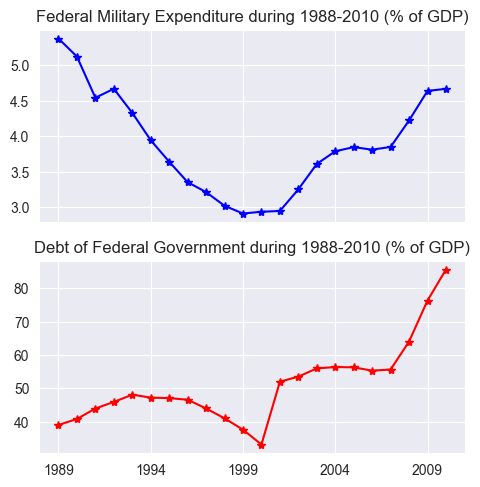

In [38]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1]);

la primera gráfica de arriba se muestra el gasto militar federal de 1988 a 2010 se logra ver al inicio en 1988 el gasto militar venia disminuyendo hasta el 2001 y desde el 2001 en adelante empieza aumentar hasta el 2010, se puede inferir que esto se debio a la amenaza global que pudo haber generado el ataque a las torres gemelas a la mayor economia del mundo estados unidos. En la segunda grafica de abajo se muestra el gasto del gobierno federal de 1988 a 2010 al inicio este, estaba aumentando hasta el año 1993 de ahi empieza disminuir hasta el año 2000 y luego del año 2000 en adelante empieza a aumentar nuevamente hasta el año 2010 que es hasta el año donde hay informacion de la base de datos.

## Datos de panel

- Preparemos los datos necesarios para trazar la figura correspondiente. Seguiremos el código que hemos utilizado para los datos transversales y de series temporales en este capítulo. Empezaremos creando un `DataFrame con los datos de las cuatro empresas mencionadas en el gráfico anterior`. Esto se hace de la siguiente manera:

In [39]:
chn = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='CHN'), :].drop(data.columns[range(3)], axis=1) #China
chn = pd.Series(data=chn.values[0], index=chn.columns)
chn.dropna(inplace=True)
chn.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1989                       2.499185
1990                       2.555996
1991                       2.407892
1992                       2.518629
dtype: object

In [40]:
usa = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='USA'), :].drop(data.columns[range(3)], axis=1) #USA
usa = pd.Series(data=usa.values[0], index=usa.columns)
usa.dropna(inplace=True)
usa.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1960                        8.35266
1961                       8.487129
1962                       8.656586
1963                       8.189007
dtype: object

In [41]:
ind = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='IND'), :].drop(data.columns[range(3)], axis=1) #India
ind = pd.Series(data=ind.values[0], index=ind.columns)
ind.dropna(inplace=True)
ind.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1960                       1.866015
1961                       1.933365
1962                       2.561202
1963                       3.758057
dtype: object

In [42]:
gbr = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='GBR'), :].drop(data.columns[range(3)], axis=1) #United Kingdom
gbr = pd.Series(data=gbr.values[0], index=gbr.columns)
gbr.dropna(inplace=True)
gbr.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1960                       6.343041
1961                       6.190022
1962                       6.210394
1963                       6.082126
dtype: object

In [43]:
n_years = chn.shape[0]

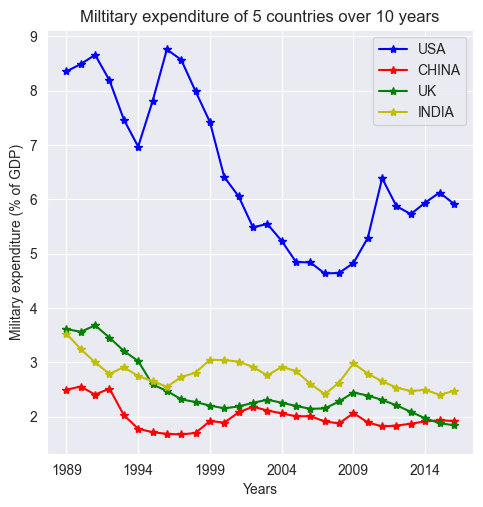

In [44]:
plt.figure(figsize=(5.5, 5.5))
usa[1:n_years].plot(linestyle='-', marker='*', color='b')
chn[1:n_years].plot(linestyle='-', marker='*', color='r')
gbr[n_years+1:2*n_years].plot(linestyle='-', marker='*', color='g')
ind[n_years+1:2*n_years].plot(linestyle='-', marker='*', color='y')
plt.legend(['USA','CHINA','UK','INDIA'], loc=1)
plt.title('Miltitary expenditure of 5 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years');

segun el grafico anterior se muestra el grafico de los 4 paises con las mejores economias y su gasto militar y se observa que Estados Unidos fue el pais que mas invirtio en el gasto militar, incluso gastando hasta 3 y 4 veces mas que China quien fue el pais que menos invirtio en gasto militar, aunque todos por igual han estado disminuyendo su gasto militar a lo largo de los años, y Estados Unidos tambien, sin embargo ha presentado mayor variabilidad en su gasto militar, esto se puede deber a los conflictos que constantemente se ve envuelto.

## Tendencia general

In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_excel('datasets/Monthly_CO2_Concentrations.xlsx', converters={'Year': np.int32, 'Month': np.int32})

In [32]:
data.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


- Creamos índice de filas del `DataFrame` utilizando las columnas `Year` y `Month`

In [48]:
data.index = data['Year'].astype(str) + '-' + data['Month'].astype(str).map(lambda x: '0'+x if len(x) == 1 else x)
data.head()

,CO2,Year,Month
1974-05,333.13,1974,5
1974-06,332.09,1974,6
1974-07,331.10,1974,7
1974-08,329.14,1974,8
1974-09,327.36,1974,9


In [49]:
data = data.loc[(~pd.isnull(data['CO2'])) & \
                (~pd.isnull(data['Year']))& \
                (~pd.isnull(data['Month']))]

In [50]:
data.sort_values(['Year', 'Month'], inplace=True)

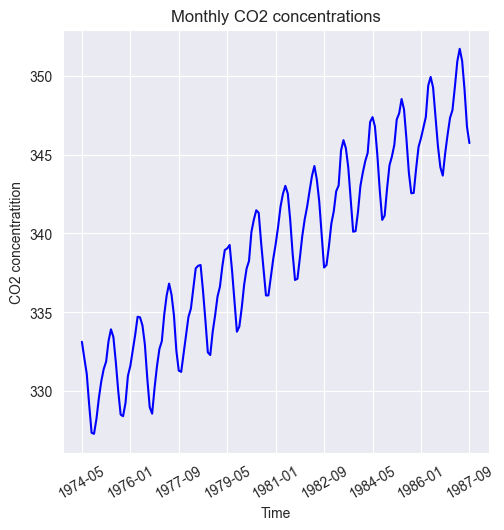

In [51]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

- se puede ver en el grafico anterior que hay un aumento de manera sostenida de las concentraciones de CO2

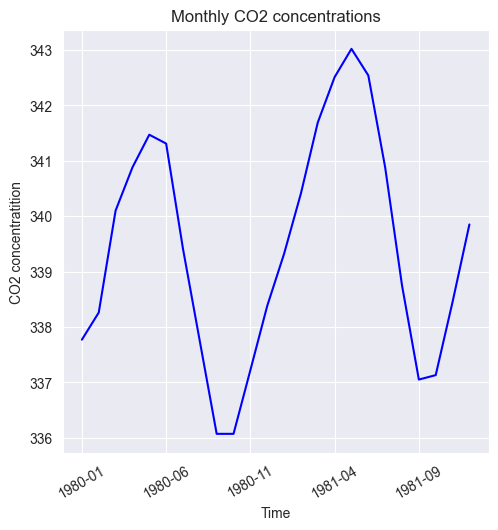

In [48]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

- se puede ver que la tendencia que se habia observado en el grafico de mas arriba acerca de la Concentarcio de C02 ya no la hay, lo cual no indica que la serie se ha vuelto estacionaria fluctuando alrededor de su media que es 0

- A continuación, vamos a ajustar la línea de tendencia. Para ello importamos la clase `LinearRegression` de `scikit-learn` y ajustamos un modelo lineal al índice temporal. Para instalar la librería, utilice la orden

```shell
pip install -U scikit-learn
```

In [52]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [53]:
trend_model = LinearRegression(fit_intercept=True)
trend_model.fit(np.arange(data.shape[0]).reshape((-1,1)), data['CO2'])

LinearRegression()

In [54]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_))

Trend model coefficient=0.1209930124223602 and intercept=329.45310559006214


- El `residual` obtenido a partir del modelo de línea de tendencia se muestran en la siguiente figura, el cual `presenta un comportamiento estacional`, el cual se analizará en la siguiente sección. Los residuos se calculan y se representan mediante las siguientes líneas de código

In [55]:
residuals = np.array(data['CO2']) - trend_model.predict(np.arange(data.shape[0]).reshape((-1,1)))

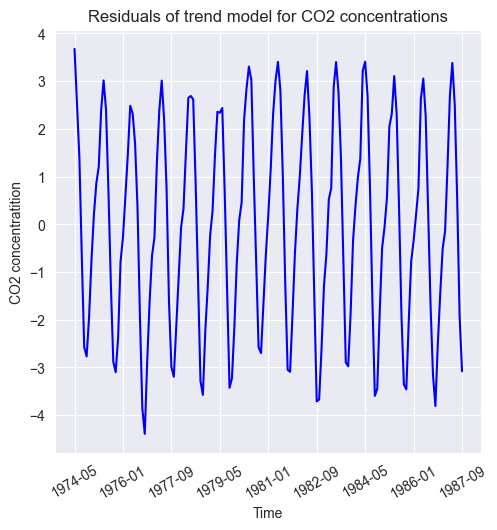

In [56]:
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

segun el grafico de los residuos se infiere que la estacionalidad en las concentraciones de CO2 presenta aditividad en el tiempo.

## Gráfico de subserie estacional

- En primer lugar, tenemos que `añadir los residuos y las etiquetas trimestrales al DataFrame de concentraciones de CO2` de la siguiente forma

In [57]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'}
data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))

- A continuación, `se calculan la media estacional y las desviaciones típicas agrupando los datos por Year y Quarter`. 

In [58]:
seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

- Creamos índices de filas de `seasonal_sub_series_data` utilizando `Year & Quarter`

In [59]:
seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']
seasonal_sub_series_data.head()

,Year,Quarter,Quarterly Mean,Quarterly Standard Deviation
1974-Q2,1974,Q2,3.096398,0.820946
1974-Q3,1974,Q3,-0.616085,1.991671
1974-Q4,1974,Q4,-1.822397,1.014952
1975-Q1,1975,Q1,0.754624,0.511890
1975-Q2,1975,Q2,2.604978,0.355093


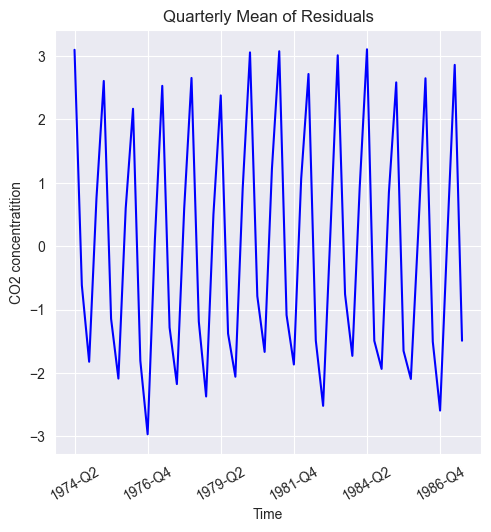

In [60]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

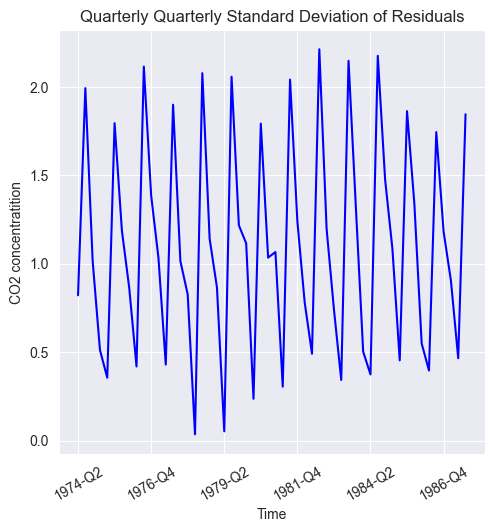

In [58]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

## Gráficos de cajas múltiples

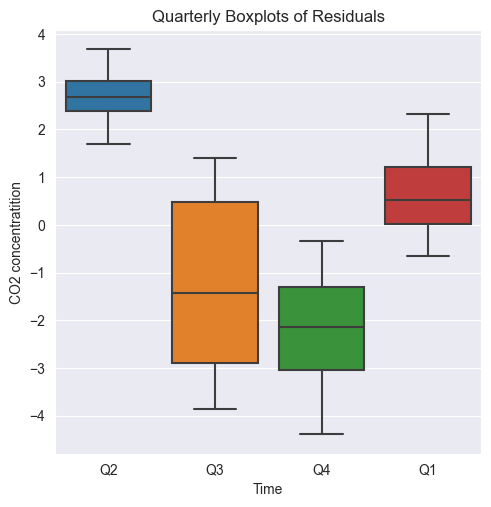

In [59]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=data, y='Residuals', x='Quarter')
g.set_title('Quarterly Boxplots of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition');

segun el boxplot de los residuales se observa que las estimaciones de los cuartiles 2 y 4 son las mas lejanas a los datos reales teniendo sobre y sub estimación respectivametne. Por otra parte, el cuartil 3 es el que presenta mayor dispersión y El cuartil 1 es el que mejor se ajusta a los datos. 

In [61]:
inflation = pd.read_excel('datasets/inflation-consumer-prices-annual.xlsx', parse_dates=['Year'])

In [61]:
inflation.head()

,Year,India,United States
0,1960-01-01,1.783265,1.509929
1,1961-01-01,1.752022,1.075182
2,1962-01-01,3.576159,1.116071
3,1963-01-01,2.941176,1.214128
4,1964-01-01,13.354037,1.308615


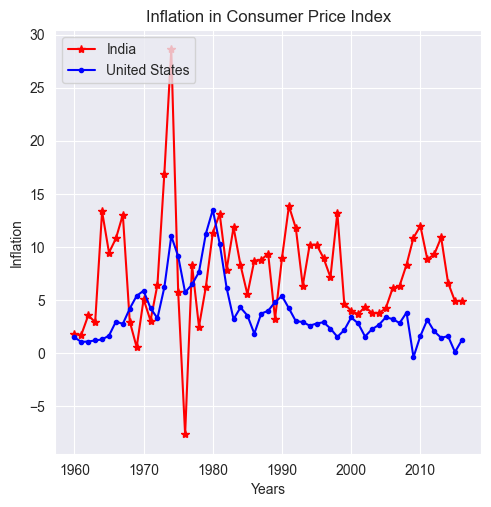

In [62]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*', color='r')
plt.plot(range(1960,2017), inflation['United States'], linestyle='-', marker='.', color='b')
plt.legend(['India','United States'], loc=2)
plt.title('Inflation in Consumer Price Index')
plt.ylabel('Inflation')
plt.xlabel('Years');

segun el grafico anterior se ve que la India ha sido mas inestable en cuanto a la inflacion, ya que se puede ver que ha tenido muchas fluctuaciones presentando unos picos bastantes pronunciados tanto arriba como abajo, en cambio Estados Unidos ha sido mas estable en tratar de controlar la inflacion.

## Modelos de media cero

- Los modelos de media cero `tienen una media y una varianza constantes y no muestran tendencias predecibles ni estacionalidad`. Se supone que las observaciones de un modelo de media cero son independientes e idénticamente distribuidas (iid) y representan el ruido aleatorio en torno a una media fija, que se ha deducido de la serie temporal como un término constante. Consideremos que $Y_{1}, Y_{2},\dots, Y_{n}$ representan las variables aleatorias correspondientes a $n$ observaciones de un modelo de media cero. Si $y_{1}, y_{2},\dots, y_{n}$ son $n$ observaciones de la serie temporal de media cero, la distribución conjunta de las observaciones viene dada por el producto de las funciones de masa de probabilidad para cada índice temporal.

In [63]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [64]:
zero_mean_series = np.random.normal(loc=0.0, scale=1., size=100)

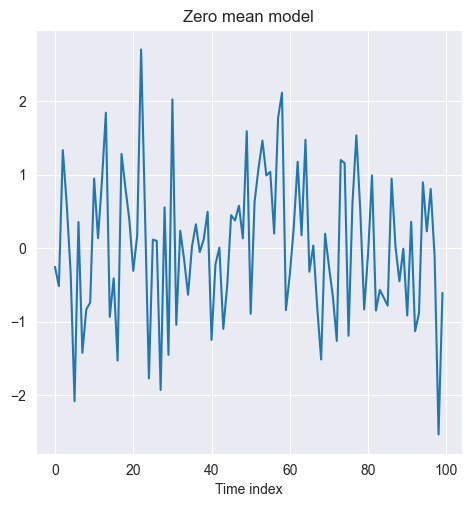

In [65]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(zero_mean_series)
g.set_title('Zero mean model')
g.set_xlabel('Time index');

segun el grafico anterior se ve que la India ha sido mas inestable en cuanto a la inflacion, ya que se puede ver que ha tenido muchas fluctuaciones presentando unos picos bastantes pronunciados tanto arriba como abajo, en cambio Estados Unidos ha sido mas estable en tratar de controlar la inflacion.

## Recorrido aleatorio

In [66]:
random_walk = np.cumsum(zero_mean_series)

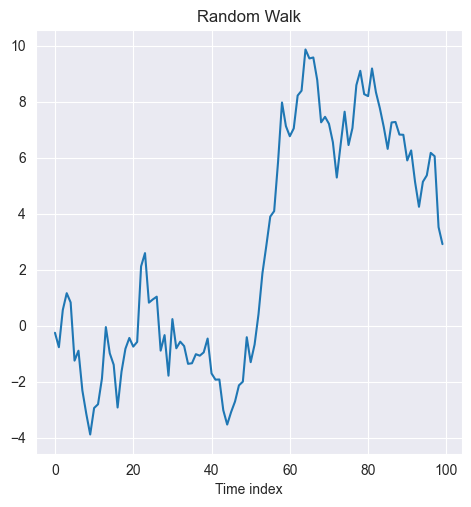

In [67]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index');

## Modelos de tendencia

- Este tipo de modelo pretende `captar la tendencia a largo plazo de la serie temporal que puede ajustarse como regresión lineal del índice temporal`. Cuando la serie temporal no presenta fluctuaciones periódicas o estacionales, puede expresarse simplemente como la suma de la tendencia y la media nula como $y_{t} = \mu(t) + x_{t}$, donde $\mu(t)$ es la tendencia a largo plazo dependiente del tiempo de la serie.

- La elección del modelo de tendencia $\mu(t)$ es fundamental para captar correctamente el comportamiento de la serie temporal. El análisis exploratorio de datos suele proporcionar pistas para plantear la hipótesis de si el modelo debería ser lineal o no lineal en $t$. Un modelo lineal es simplemente $\mu(t) = wt + b$, mientras que un modelo cuadrático es $\mu(t) = w_{1}t + w_{2}t^{2} + b$. A veces, la tendencia se puede hipotetizar mediante una relación compleja en términos del índice temporal, como $\mu(t) = w_{0}t^{p} + b$.

- Los pesos y sesgos en los modos de tendencia como los discutidos anteriormente se obtienen ejecutando una regresión con $t$ como variable explicativa y $\mu$ como explicada. Los residuos $y_{t} - \mu(t)$ del modelo de tendencia es considerado el ruido irreducible y como realización del componente de media cero $y_{t}$.

## Autocorrelación y autocorrelación parcial

- Tras aplicar las transformaciones matemáticas comentadas en el apartado anterior, a menudo nos encontramos con lo que se conoce como una `serie temporal estacionaria` (o `débilmente estacionaria`), que se caracteriza por una `media constante` $E(y_{t})$ y una `correlación que solo depende del desfase entre dos pasos temporales, pero independiente del valor del paso temporal, esto es, su distribución de probabilidad es completamente independiente del tiempo`. Este tipo de covarianza es la clave en el análisis de series temporales y se denomina autocovarianza o autocorrelación, cuando se normaliza en el intervalo de -1 a 1. 

- La autocorrelación refleja el grado de dependencia lineal entre la serie temporal en el índice $t$ y las series temporales de los índices $t-k$ o $t+k$. `Una autocorrelación positiva indica que los valores presentes y futuros de la serie temporal se mueven en la misma dirección, mientras que los valores negativos significan que los valores presentes y futuros se mueven en sentido contrario. Si la autocorrelación es cercana a cero, las dependencias temporales dentro de la serie pueden ser difíciles de encontrar`. Debido a esta propiedad, la autocorrelación es útil para predecir el estado futuro de una serie temporal a $h$ pasos por delante.

````{prf:definition}
:label: def_autocorr_func

- La `covarianza` entre $y_{t}$ y su valor en otro período de tiempo, digamos, $y_{t+k}$ se denomina `autocovarianza en el desfase (lag)` $k$ y se define como

$$
\gamma_{k}=\textsf{Cov}(y_{t}, y_{t+k})=\textsf{E}[(y_{t}-\mu)(y_{t+k}-\mu)].
$$

- La colección de los valores de $\gamma_{k}, k = 0, 1, 2,\dots$ se denomina `función de autocovarianza`. Tenga en cuenta que la autocovarianza en el lag $k = 0$ es solo la `varianza` de la serie temporal; es decir, $\gamma_{0}=\sigma_{y}^{2}$, que es constante para una serie de tiempo estacionaria.

- El `coeficiente de autocorrelación` en el lag $k$ para una serie temporal estacionaria es

$$
\rho_{k}=\frac{\textsf{E}[(y_{t}-\mu)(y_{t+k}-\mu)]}{\sqrt{\textsf{E}[(y_{t}-\mu)^2]\textsf{E}[(y_{t+k}-\mu)^{2}]}}=\frac{\textsf{Cov}(y_{t}, y_{t+k})}{\textsf{Var}(y_{t})}=\frac{\gamma_{k}}{\gamma_{0}}.
$$

- El conjunto de los valores de $\rho_{k}, k = 0, 1, 2, \dots$ se denomina `función de autocorrelación (ACF)`. Obsérvese que, por definición, $\rho_{0} = 1$. Además, la `ACF` es independiente de la escala de medición de la serie temporal, por lo que `es una cantidad adimensional`. Además, $\rho_{k} = \rho_{-k}$; es decir, la `ACF` es simétrica en torno a cero, por lo que solo es necesario calcular la mitad positiva (o negativa).

- Si una serie temporal tiene una media y una función de autocovarianza finitas, se dice que es `estacionaria de segundo orden (o débilmente estacionaria de orden 2)`. Si, además, la distribución de probabilidad conjunta de las observaciones en todo momento es `normal multivariante`, entonces eso sería suficiente para dar lugar a una serie temporal estrictamente estacionaria.

- Es necesario estimar la `autocovarianza` y los `ACF` a partir de una serie temporal de longitud finita, digamos, $y_{1}, y_{2}, \dots, y_{T}$. La estimación habitual de la función de autocovarianza es

    $$
    \\[1mm]
    c_{k}=\hat{\gamma}_{k}=\frac{1}{T}\sum_{t=1}^{T-k}(y_{t}-\overline{y})(y_{t+k}-\overline{y}),\quad k=1,2,\dots,K,
    $$
    
    y la `ACF` es estimada por la `función de autocorrelación muestral` (o `ACF muestral`)
    
    $$
    \\[1mm]
    r_{k}=\hat{\rho}_{k}=\frac{c_{k}}{c_{0}},\quad k=0,1,2,\dots,K.
    $$
````

**`Experimentos numéricos`**

- La presencia de autocorrelación puede identificarse trazando los valores observados de la `función de autocorrelación (ACF)` de una serie temporal determinada.
 Este gráfico suele denominarse `ACF`. Ilustremos cómo el trazado de los valores observados de la `ACF` puede ayudar a detectar la presencia de autocorrelación. Para ello, trazaremos primero el valor diario del `Dow Jones Industrial Average (DJIA)` observado durante enero de 2016 a diciembre de 2016

In [68]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [68]:
djia_df = pd.read_excel('datasets/DJIA_Jan2016_Dec2016.xlsx')

In [69]:
djia_df.index = djia_df['Date']
djia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-01-04,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


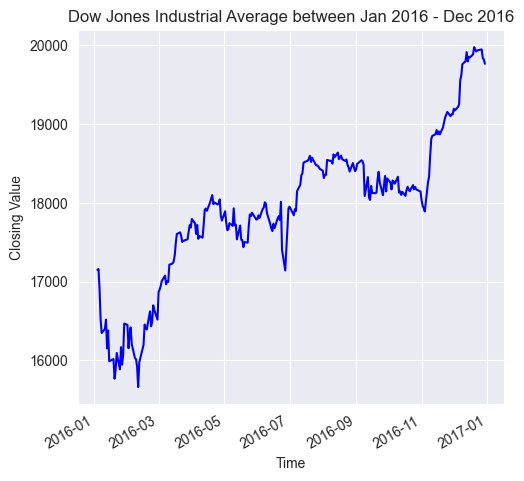

In [70]:
plt.figure(figsize=(5.5, 5.5))
djia_df['Close'].plot(color='b')
plt.title('Dow Jones Industrial Average between Jan 2016 - Dec 2016')
plt.xlabel('Time')
plt.ylabel('Closing Value');

- De la figura anterior se desprende que cuando el DJIA empieza a subir, continúa haciéndolo durante algún tiempo y viceversa. Sin embargo, debemos comprobarlo mediante un gráfico ACF. 

In [72]:
lag = range(0,31)
djia_acf = []
for l in lag:
    djia_acf.append(djia_df['Close'].autocorr(l))

- El código anterior, itera sobre una lista de 100 valores del lag empezando de 0 a 30. Un desfase de 0 indica autocorrelación de una observación consigo misma (en otras palabras, autocorrelación) y por lo tanto, se espera que sea 1.0, como también se confirma en la figura siguiente. Autocorrelación en *DJIA Close* `parece disminuir linealmente con el retardo`, con un cambio aparente en la tasa de caída en torno a los 18 días. Con un desfase de 30 días, la ACF es ligeramente superior a 0.65.

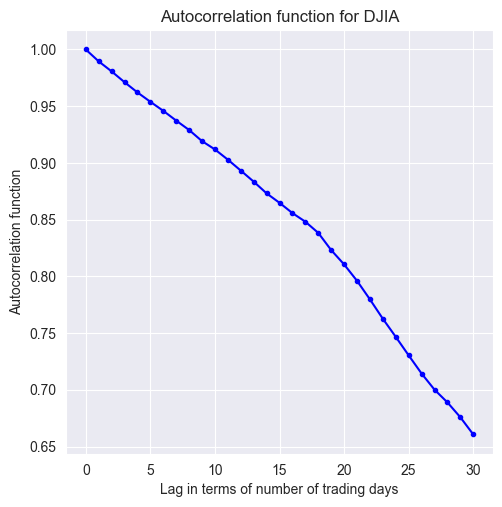

In [73]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(djia_acf, marker='.', color='b')
plt.title('Autocorrelation function for DJIA')
plt.xlabel('Lag in terms of number of trading days')
plt.ylabel('Autocorrelation function');

- El gráfico ACF muestra que la autocorrelación, en el caso de los valores de cierre del *DJIA*, tienen una `dependencia funcional del desfase temporal entre las observaciones`. 

<Figure size 550x550 with 0 Axes>

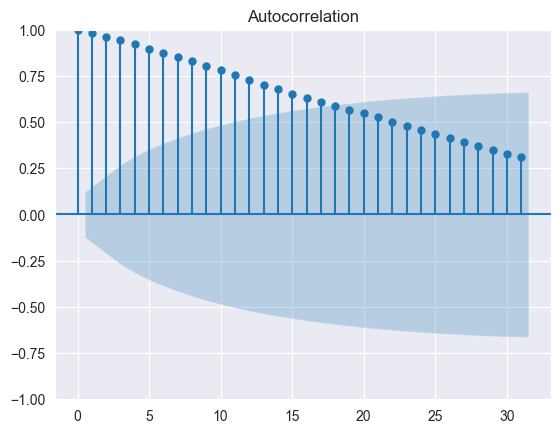

In [74]:
plt.figure(figsize=(5.5, 5.5))
plot_acf(djia_df['Close'], lags=31);

se logra ver que hay autocorrelacion parcial en los 2 primeros rezagos y son significativos, para los demas rezagos se logran mantener dentro del intervalo de confianza.

<Figure size 550x550 with 0 Axes>

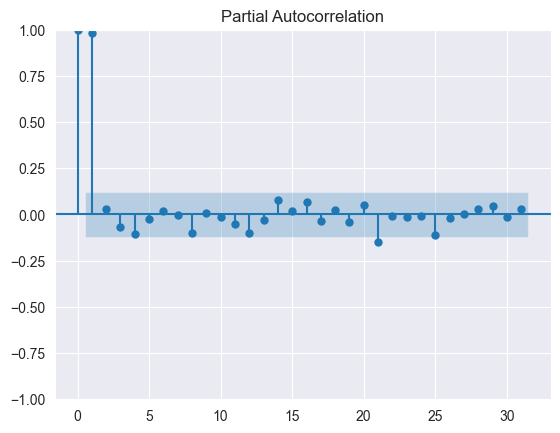

In [75]:
plt.figure(figsize=(5.5, 5.5))
plot_pacf(djia_df['Close'], lags=31);

- En el gráfico anterior se observa la autocorrelación parcial sólo en el retardo uno es estadísticamente significativa, mientras que para el resto de los rezagos está dentro de los intervalos de confianza del 95%. Por lo tanto, para los valores de cierre del *DJIA* el orden de los modelos $AR$ es uno (usar $AR(1)$).

# Análisis de datos de series temporales

- Hemos abordado en el capítulo previo un enfoque general del análisis de series temporales que consta de dos pasos principales:

    - Visualización de los datos para comprobar la presencia de `tendencias, estacionalidad y patrones cíclicos`
    - Ajuste de la tendencia y la estacionalidad para generar series estacionarias

- La deducción de la tendencia, la estacionalidad y los componentes cíclicos nos dejaría con fluctuaciones irregulares que no se pueden modelar utilizando únicamente el índice temporal como variable explicativa. Por lo tanto, para mejorar aún más la previsión, las fluctuaciones irregulares se asumen como observaciones independientes e idénticamente distribuidas (iid) y se modelan mediante una regresión lineal sobre variables distintas del índice temporal.

- Los ajustes de tendencia y estacionalidad junto con un modelo sobre variables exógenas sería una mejor previsión para los casos futuros de la serie temporal. El cambio de la serie temporal original a observaciones `iid`, o en otras palabras, la estacionalización de una serie temporal, es un paso importante para el desarrollo modelos de regresión lineal sobre variables exógenas. Esto se debe a que existen `métodos estadísticos bien establecidos, por ejemplo teorema central del límite, el método de los mínimos cuadrados, etc., funcionan bien para las observaciones iid.`

- La metodología de análisis de series temporales descrita en los párrafos anteriores se resume en el siguiente diagrama de flujo. En este capítulo, cubriremos los pasos 1, 2 y 3 de esta metodología en los siguientes temas:

    - Procesamiento avanzado y visualización de los datos de las series temporales
    - Pruebas estadísticas de hipótesis para verificar la estacionariedad de una serie temporal
    - Descomposición de las series temporales para ajustar las tendencias y la estacionalidad

- Los conceptos matemáticos tratados en este capítulo son fundamentales para el desarrollo de modelos predictivos de series temporales.

```{figure} ./figures/fig1_chapter1.png
:name: fig1_chapter1
:align: center
:scale: 80
```

## Procesamiento avanzado y visualización de datos de series temporales

In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

- A continuación se leen los datos del archivo `CSV` en un `pandas.DataFrame` y mostramos las primeras filas del `DataFrame`

In [71]:
df = pd.read_csv('datasets/chemical-concentration-readings.csv')
print('Shape of the dataset:', df.shape)
df.head()

Shape of the dataset: (197, 2)


,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1


In [72]:
datetime_rowid = df['Timestamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid
df.head()

,Timestamp,Chemical conc.
Timestamp,,
1975-01-01 00:00:00,1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,1975-01-01 08:00:00,17.1


- Ahora estamos listos para aplicar las funciones de `resample` y `mean` en la columna `Chemical conc.`

In [73]:
daily = df['Chemical conc.'].resample('D')
daily_mean = daily.mean()

- Observe que hemos pasado el argumento `D` a la función `resample` para generar las medias diarias. Para los agregados mensuales y anuales, tenemos que pasar `M` e `Y` a la función `resample`. Por último, los promedios originales y diarios se representan en la siguiente figura, que muestra el efecto de suavización de esta última.

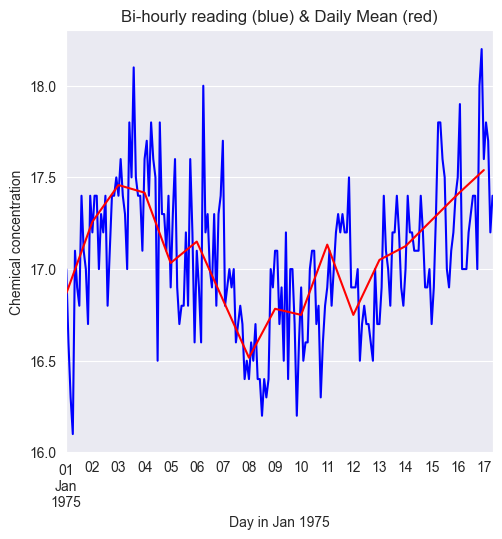

In [74]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
df['Chemical conc.'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')
ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)');
ax.set_xlabel('Day in Jan 1975');
ax.set_ylabel('Chemical concentration');

## Agregación por grupos

In [75]:
df = pd.read_csv('datasets/mean-daily-temperature-fisher-river.csv')
df.index = df['Date'].map(lambda d: pd.to_datetime(d, format = '%Y-%m-%d'))

In [82]:
print('Shape of dataframe:', df.shape)
df.head()

Shape of dataframe: (1461, 2)


,Date,Mean temperature
Date,,
1988-01-01,1988-01-01,-23.0
1988-01-02,1988-01-02,-20.5
1988-01-03,1988-01-03,-22.0
1988-01-04,1988-01-04,-30.5
1988-01-05,1988-01-05,-31.0


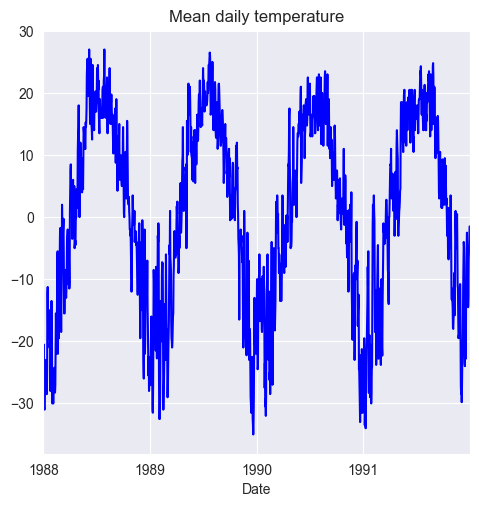

In [76]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
df['Mean temperature'].plot(ax=ax, color='b')
ax.set_title('Mean daily temperature');

- `La serie temporal original parece tener patrones mensuales que se repiten cada año y que pueden verificarse calculando los promedios mensuales. Esto se hace uniendo los datos en 12 meses y luego calculando los promedios de cada mes`. 

In [77]:
df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))
df.head()

,Date,Mean temperature,Month_Year
Date,,,
1988-01-01,1988-01-01,-23.0,01-1988
1988-01-02,1988-01-02,-20.5,01-1988
1988-01-03,1988-01-03,-22.0,01-1988
1988-01-04,1988-01-04,-30.5,01-1988
1988-01-05,1988-01-05,-31.0,01-1988


- la columna `Mean temperature` se agrupa con respecto a la nueva columna columna `Month_Year` y se calculan la media, la mediana y las desviaciones estándar de cada mes

In [78]:
monthly_stats = df.groupby(by='Month_Year')['Mean temperature'].aggregate([np.mean, np.median, np.std])
monthly_stats.reset_index(inplace=True)
monthly_stats.head()

,Month_Year,mean,median,std
0,01-1988,-22.137097,-23.0,5.260640
1,01-1989,-17.129032,-18.0,8.250725
2,01-1990,-15.112903,-12.0,6.606764
3,01-1991,-23.038710,-24.5,7.095570
4,02-1988,-19.025862,-19.5,8.598522


-  las filas de la tabla anterior no están en orden ascendente de `Month_Year`. Por lo tanto, es necesario registrarlo. 
El siguiente codigo realiza esta accion. 

In [79]:
monthly_stats['Year'] = monthly_stats['Month_Year']\
.map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))

monthly_stats['Month'] = monthly_stats['Month_Year']\
.map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))

monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.head()

,Month_Year,mean,median,std,Year,Month
0,01-1988,-22.137097,-23.000,5.260640,1988,01
4,02-1988,-19.025862,-19.500,8.598522,1988,02
8,03-1988,-8.258065,-9.250,5.341459,1988,03
12,04-1988,2.641667,1.875,5.057720,1988,04
16,05-1988,11.290323,11.000,6.254364,1988,05


- Los agregados mensuales se representan en la siguiente figura, que pone de manifiesto la `estacionalidad mensual` existente en los datos originales.

In [80]:
monthly_stats.index = monthly_stats['Month_Year']

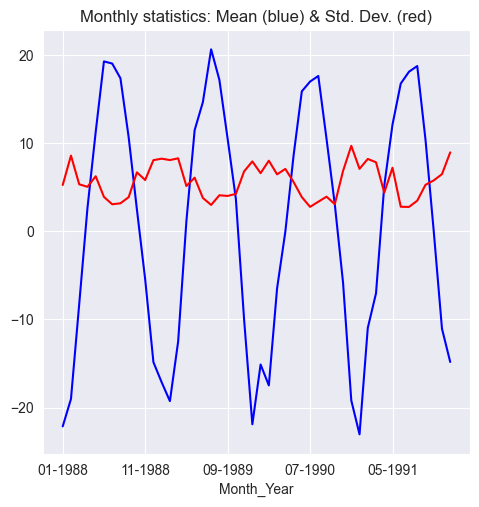

In [81]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

monthly_stats['mean'].plot(ax=ax, color='b')
monthly_stats['std'].plot(ax=ax, color='r')

ax.set_title('Monthly statistics: Mean (blue) & Std. Dev. (red)');

## Estadísticas moviles

- Vamos a demostrar cómo se pueden calcular las medias móviles en el conjunto de datos de Fisher River. Calcularemos las medias móviles semanales, fijando el tamaño de la ventana en siete y deslizando la ventana un lugar a la derecha

In [82]:
weekly_moving_average = df['Mean temperature'].rolling(7).mean()

In [83]:
monthly_moving_average = df['Mean temperature'].rolling(30).mean()

- Para agregar una longitud de paso de más de uno, seguimos calculando la media móvil como se ha mostrado anteriormente, pero cortamos la serie resultante para obtener el resultado deseado. Para las franjas de más de dos unidades de tiempo utilizamos el siguiente código

In [84]:
weekly_moving_average_2stride = df['Mean temperature'].rolling(7).mean()[::2]

In [85]:
monthly_moving_average_2stride = df['Mean temperature'].rolling(30).mean()[::2]

- En el análisis de series temporales, las estadísticas móviles basadas en la longitud de paso son las más comunes, por lo que muy poco se necesitará algo más que la función rolling. Los datos originales se representan
en la siguiente figura:

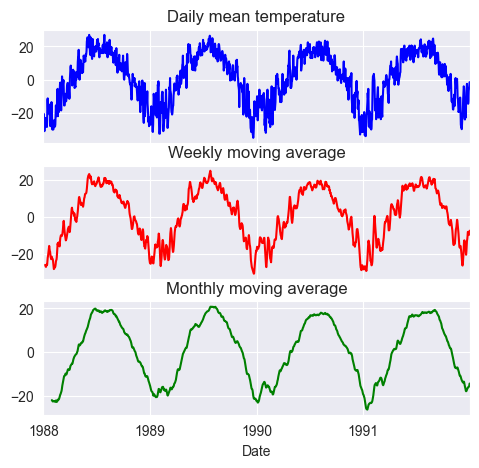

In [86]:
fig, axarr = plt.subplots(3, sharex=True)
fig.set_size_inches(5.5, 5,5)

df['Mean temperature'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Daily mean temperature');

weekly_moving_average.plot(ax=axarr[1], color='r')
axarr[1].set_title('Weekly moving average');

monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average');

## Procesos estacionarios

```{prf:definition} Serie temporal estacionaria
:label: def_stationarity

- Una serie de tiempo se dice que es `estrictamente estacionaria` si sus propiedades no se ven afectadas por un cambio en el origen temporal. Es decir, si la distribución de probabilidad conjunta de las observaciones $y_{t}, y_{t+1}, y_{t+2}, \dots, y_{t+n}$ es exactamente igual a la distribución de las observaciones $y_{t+k}, y_{t+k+1}, y_{t+k+2}, \dots, y_{t+k+n}$ entonces la es estrictamente estacionaria. 

- Cuando $n = 0$, el supuesto de estacionariedad significa que la distribución de probabilidad de $y_{t}$ es la misma en todos los periodos de tiempo y puede escribirse como $f(y)$.

- Estacionarieda implica un tipo de `equilibrio estadístico o estabilidad` en los datos. En consecuencia, la serie temporal tiene una media constante definida de la forma habitual como

    $$
    \mu_{y}=\textsf{E}(y)=\int_{-\infty}^{\infty}yf(y)dy
    $$
    
    y una varianza constante definida como
    
    $$
    \\[1mm]
    \sigma_{y}^{2}=\textsf{Var}(y)=\int_{-\infty}^{\infty}(y-\mu_{y})^{2}f(y) dy.
    $$

- Para estimar estos parámetros se utilizan la `media y la varianza muestrales`. Si las observaciones de la serie temporal son $y_{1}, y_{2},\dots, y_{T}$, la media muestral es

    $$
    \overline{y}=\hat{\mu}_{y}=\frac{1}{T}\sum_{t=1}^{T}y_{t}
    $$
    
    y la varianza muestral es
    
    $$
    s^{2}=\hat{\sigma}_{y}^{2}=\frac{1}{T}\sum_{t=1}^{T}(y_{t}-\overline{y})^{2}.
    $$ (sample_variance_T)

- Obsérvese que el divisor en la Ecuación {eq}`sample_variance_T` es $T$ en lugar del más familiar $T-1$. Esta es la convención común en muchas aplicaciones de series temporales, como $T$ no suele ser pequeño, habrá poca diferencia entre utilizar $T$ en lugar de $T-1$.

```

##EJEMPLO

In [94]:
from random import seed
from pandas import Series
import random 
from pandas.plotting import autocorrelation_plot

- Usamos una semilla `seed` generadora de números aleatorios, y creamos una serie de ruido blanco

In [95]:
seed(1)
series = [random.gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)
series.describe()

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64

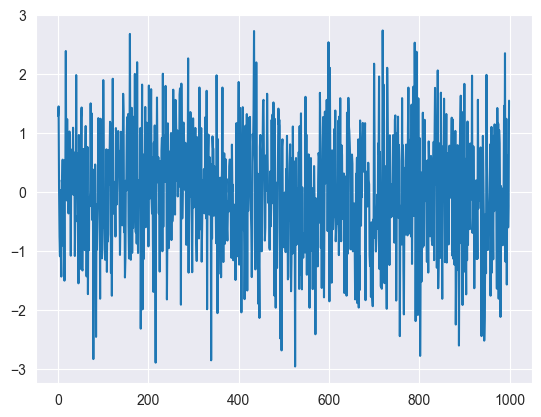

In [96]:
series.plot();

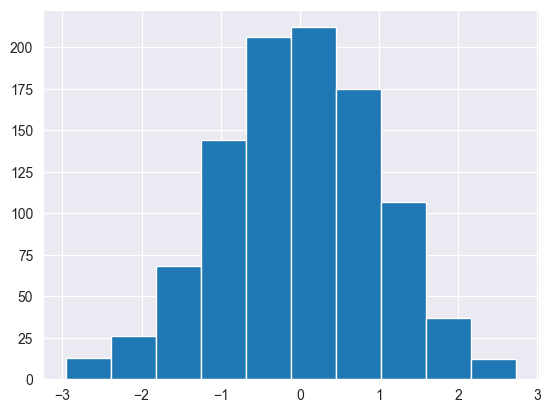

In [97]:
series.hist();

## Transformación de datos y ajustes

- Las transformaciones de datos son útiles en muchos aspectos del trabajo estadístico, a menudo para `estabilizar la varianza de los datos`. La varianza no constante es bastante común en los datos de series temporales. Procesos con esta característica se dice que presentan `heteroscedasticidad`. Los modelos `GARCH` son bastante utilizados para este tipo de datos. Un ejemplo de este tipo de series de tiempo, puede ser la asociada con la volatilidad que acciones que presentan fuertes patrones no lineales, tales como `Tesla` o por ejemplo la de la criptomoneda `BTC`, a las cuales se les puede aplicar cierta transformación logarítmica para reducir varianza.

## Ajustes estacionales y de tendencia

````{prf:definition}

- Los modelos de tendencia que se suelen considerar son la tendencia lineal, en la que se espera que la media de $y_{t}$ cambie linealmente con el tiempo, como en

    $$
    \textsf{E}(y_{t})=\beta_{0}+\beta_{1}t,
    $$
    
    o como una función cuadrática del tiempo. 
    
    $$
    \textsf{E}(y_{t})=\beta_{0}+\beta_{1}t+\beta_{2}t^{2},
    $$
    
    o incluso posiblemente como una función exponencial del tiempo como
    
    $$
    \textsf{E}(y_{t})=\beta_{0}e^{\beta_{1}t}.
    $$

- Cada uno de estos modelos son usualmente ajustados a los datos usando mínimos cuadrados ordinarios.

````

## Diferenciación de primer orden

In [98]:
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [99]:
djia_df = pd.read_excel('datasets/DJIA_Jan2016_Dec2016.xlsx')
djia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


- Analicemos la columna `Date` y utilicémosla como índice de fila para el `DataFrame` y dejémosla como columna

In [100]:
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)
djia_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


- Utilizaremos los valores `"Close"` del `DJIA` para ilustrar la diferenciación

In [101]:
first_order_diff = djia_df['Close'].diff(1)

- Trazamos las series temporales originales y las de primera diferencia

Text(0.5, 1.0, 'First-order differences of DJIA during Jan 2016-Dec 2016')

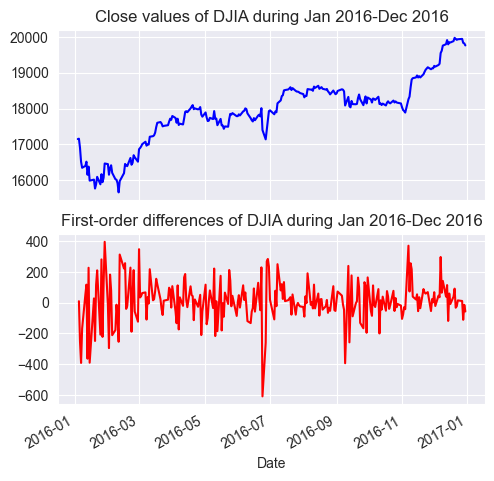

In [102]:
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')

- A continuación, se calcula el `ACF` para diferentes rezagos y se verifica la prueba de Ljung-Box. La figura siguiente muestra la `ACF` de los valores de cierre del `DJIA` y también para la serie temporal de diferencias de primer orden. Obsérvese que para las series diferenciadas, la `ACF` no muestra un patrón predecible y cae repentinamente cerca de cero. Además, el valor $p$ de la prueba es de $0.894$ para $lag=10$ nos hace aceptar la hipótesis nula de la prueba de Ljung-Box para las series diferenciadas

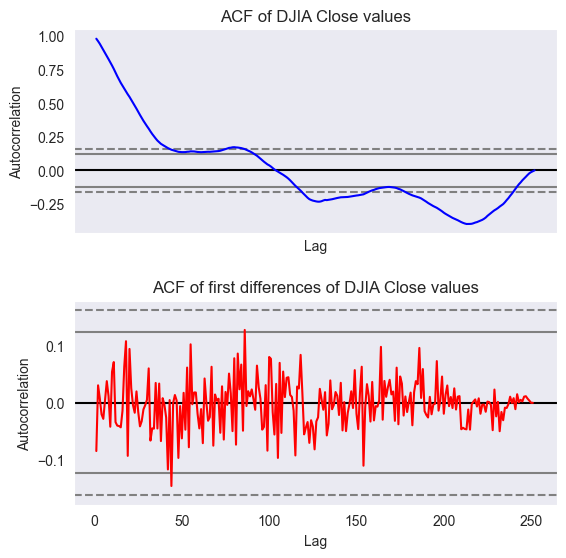

In [103]:
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(djia_df['Close'], color='b', ax=ax[0])
ax[0].set_title('ACF of DJIA Close values')
autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of DJIA Close values')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

In [104]:
acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(djia_df['Close'],
                                                                 nlags=20,
                                                                 qstat=True,
                                                                 alpha=0.05)

- Comprobemos si con un nivel de confianza del 95% ($\alpha=0.05$) si se rechaza la hipótesis nula en cualquiera de los rezagos

In [105]:
alpha = 0.05
for l, p_val in enumerate(pvalues_djia):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 2.8575062763851745e-55
Null hypothesis is rejected at lag = 1 for p-val = 1.7871763971271254e-105
Null hypothesis is rejected at lag = 2 for p-val = 9.927155881909959e-154
Null hypothesis is rejected at lag = 3 for p-val = 8.084096278834598e-200
Null hypothesis is rejected at lag = 4 for p-val = 9.125287802249553e-244
Null hypothesis is rejected at lag = 5 for p-val = 1.0907828815951678e-285
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.

- Obtengamos los intervalos de confianza, los estadísticos $Q$ de Ljung-Box y los valores $p$ para los valores diferenciados del DJIA Close

In [106]:
acf_first_diff, confint_first_diff,\
qstat_first_diff, pvalues_first_diff = stattools.acf(first_order_diff.iloc[1:],
                                                     nlags=20,
                                                     qstat=True,
                                                     alpha=0.05)

- Comprobemos si con un nivel de confianza del 95% ($\alpha = 0.05$) si se rechaza la hipótesis nula en cualquiera de los rezagos

In [107]:
alpha = 0.05
for l, p_val in enumerate(pvalues_first_diff):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is accepted at lag = 0 for p-val = 0.17742519268365275
Null hypothesis is accepted at lag = 1 for p-val = 0.35711074717194846
Null hypothesis is accepted at lag = 2 for p-val = 0.5569664476694902
Null hypothesis is accepted at lag = 3 for p-val = 0.7025937592112146
Null hypothesis is accepted at lag = 4 for p-val = 0.7937258941281415
Null hypothesis is accepted at lag = 5 for p-val = 0.8806452939902651
Null hypothesis is accepted at lag = 6 for p-val = 0.9058055508095896
Null hypothesis is accepted at lag = 7 for p-val = 0.9461503874902826
Null hypothesis is accepted at lag = 8 for p-val = 0.9529107001186853
Null hypothesis is accepted at lag = 9 for p-val = 0.9452880323047997
Null hypothesis is accepted at lag = 10 for p-val = 0.9103701842715781
Null hypothesis is accepted at lag = 11 for p-val = 0.9303312940619602
Null hypothesis is accepted at lag = 12 for p-val = 0.9412519715905939
Null hypothesis is accepted at lag = 13 for p-val = 0.9498882104867831
Null hypothesi

In [108]:
daily_temp = pd.read_excel('datasets/mean-daily-temperature-fisher-river.xlsx')
daily_temp.head()

,Date,Mean_Temperature
0,1988-01-01,-23.0
1,1988-01-02,-20.5
2,1988-01-03,-22.0
3,1988-01-04,-30.5
4,1988-01-05,-31.0


- Hacemos que la fecha formateada sea el índice de la fila del conjunto de datos y elimine la columna `Date`

In [109]:
daily_temp.index = daily_temp['Date'].map(lambda date: pd.to_datetime(date, '%Y-%m-%d'))
daily_temp.drop('Date', axis=1, inplace=True)
daily_temp.head()

,Mean_Temperature
Date,
1988-01-01,-23.0
1988-01-02,-20.5
1988-01-03,-22.0
1988-01-04,-30.5
1988-01-05,-31.0


<Axes: title={'center': 'Daily temperatures of Fisher River, TX, US'}, xlabel='Date'>

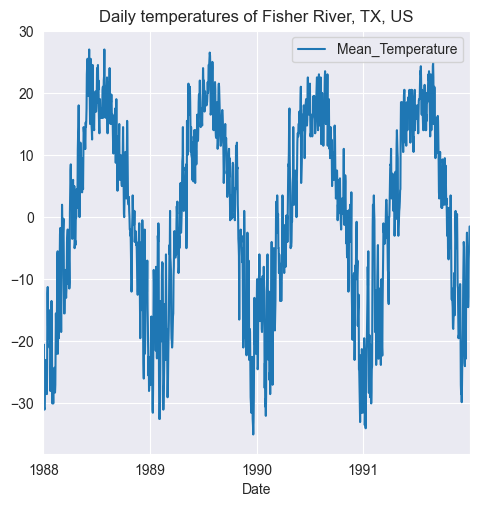

In [110]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Daily temperatures of Fisher River, TX, US')
daily_temp.plot(ax=ax)

- Calculamos la temperatura media mensual

In [111]:
montly_resample = daily_temp['Mean_Temperature'].resample('M')
monthly_mean_temp = montly_resample.mean()
print('Shape of monthly mean temperature dataset:', monthly_mean_temp.shape)
monthly_mean_temp.head()

Shape of monthly mean temperature dataset: (48,)


Date
1988-01-31   -22.137097
1988-02-29   -19.025862
1988-03-31    -8.258065
1988-04-30     2.641667
1988-05-31    11.290323
Freq: M, Name: Mean_Temperature, dtype: float64

- Trazamos la temperatura media mensual

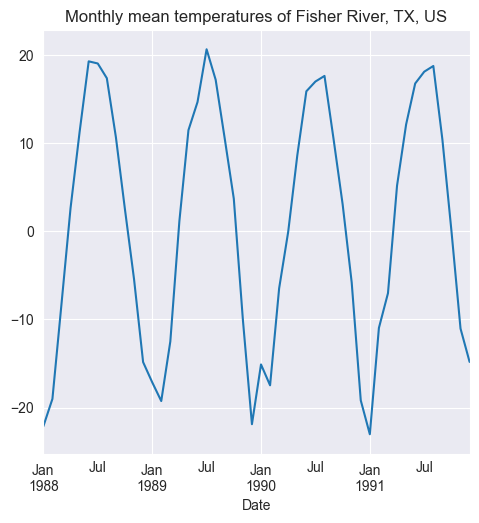

In [112]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Monthly mean temperatures of Fisher River, TX, US')
monthly_mean_temp.plot(ax=ax);

- Trazamos la ACF de la temperatura media mensual utilizando `pandas.tools.plotting.autocorrelation_plot`

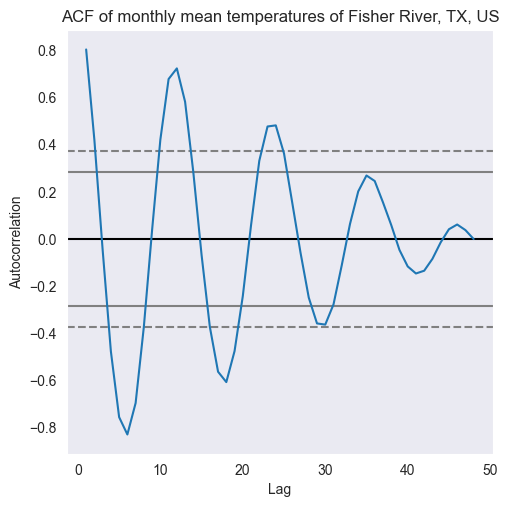

In [113]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of monthly mean temperatures of Fisher River, TX, US')
autocorrelation_plot(monthly_mean_temp, ax=ax);

- Tomamos las diferencias estacionales con un periodo de 12 meses en las temperaturas medias mensuales. La diferenciación estacional deja valores nulos en sus primeros 12 elementos, que se eliminan antes del análisis:

In [114]:
seasonal_diff = monthly_mean_temp.diff(12)
seasonal_diff = seasonal_diff[12:]

- Trazamos las diferencias estacionales. Las diferencias estacionales parecen ser variaciones aleatorias, como se muestra en la siguiente figura

<Axes: title={'center': 'Seasonal differences'}, xlabel='Date'>

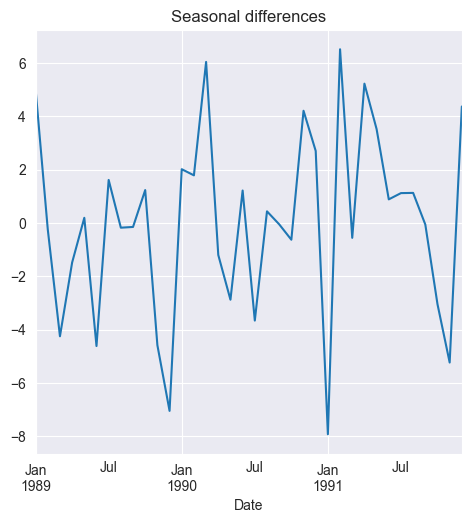

In [115]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Seasonal differences')
seasonal_diff.plot(ax=ax)

- Trazamos las diferencias estacionales. Volvemos a utilizar la función `autocorrelation_plot` para generar la `ACF` de la serie diferenciada y los intervalos de confianza al 99% del nivel de confianza. Podemos ver en la siguiente figura que la `ACF` nunca cruza los intervalos de confianza del 99% para rezagos que varían de 0 a más de 35

<Axes: title={'center': 'ACF of Seasonal differences'}, xlabel='Lag', ylabel='Autocorrelation'>

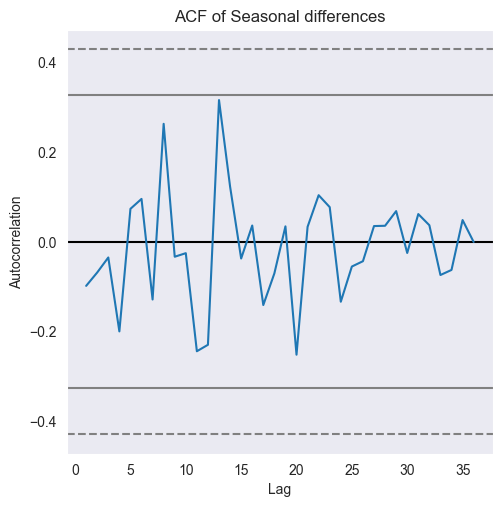

In [116]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of Seasonal differences')
autocorrelation_plot(seasonal_diff, ax=ax)

- Realice la prueba de Ljung-Box sobre la temperatura media mensual para obtener los valores $p$. Utilizaremos rezagos de hasta 10. Los valores p reales se confirman ejecutando la función `stattools.acf` en los datos medios mensuales de la siguiente manera

In [117]:
_, _, _, pval_monthly_mean = stattools.acf(monthly_mean_temp,
                                           nlags=10, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)


- La prueba de Ljung-Box se realiza también con las series diferenciadas estacionalmente

In [118]:
_, _, _, pval_seasonal_diff = stattools.acf(seasonal_diff,
                                            nlags=10, 
                                            qstat=True, 
                                            alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

Null hypothesis is rejected for lags: (array([], dtype=int64),)


- No hay rezagos para los que se rechace la hipótesis nula de la prueba de Ljung-Box.

## Prueba de Dickey-Fuller aumentada

In [119]:
air_miles = pd.read_csv('datasets/us-airlines-monthly-aircraft-miles-flown.csv')
air_miles.index = air_miles.Month

In [120]:
print('Shape of the DataFrame:', air_miles.shape)
air_miles.head()

Shape of the DataFrame: (97, 2)


,Month,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0


- Cambiemos el nombre de la segunda columna

In [121]:
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970':\
                          'Air miles flown'}, inplace=True)

- Comprobamos si existen datos faltantes y eliminamos la fila correspondiente

In [122]:
missing = pd.isnull(air_miles['Air miles flown'])
print('Number of missing values found:', missing.sum())
air_miles = air_miles.loc[~missing, :]

Number of missing values found: 1


- Trazamos la serie temporal de millas aéreas voladas

Text(0.5, 1.0, 'Monthly air miles flown during 1963 - 1970')

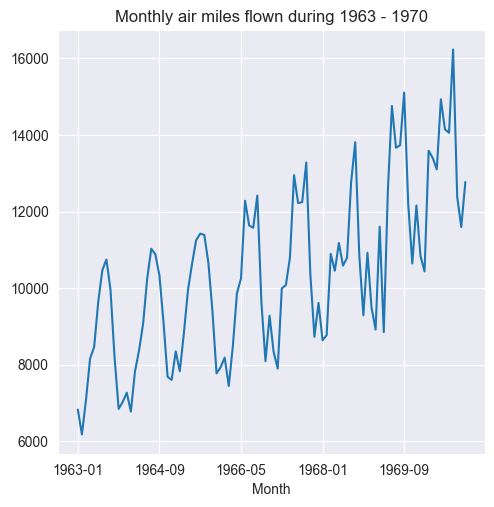

In [123]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
air_miles['Air miles flown'].plot(ax=ax)
ax.set_title('Monthly air miles flown during 1963 - 1970')